<a href="https://colab.research.google.com/github/pavan-shankar-kakitha/Projects/blob/main/Sensor_AI_Prediction_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
np.random.seed(42)
n_samples = 10000

# Generate normal sensor data
data = pd.DataFrame({
    'temperature': np.random.normal(70, 10, n_samples),
    'vibration': np.random.normal(5, 1.5, n_samples),
    'pressure': np.random.normal(30, 5, n_samples),
    'humidity': np.random.normal(40, 10, n_samples),
    'voltage': np.random.normal(220, 15, n_samples)
})

# Assign all records initially as "non-failure"
data['failure'] = 0

# Randomly introduce failure records
failure_indices = np.random.choice(n_samples, size=500, replace=False)
data.loc[failure_indices, 'temperature'] += np.random.normal(20, 5, 500)
data.loc[failure_indices, 'vibration'] += np.random.normal(3, 1, 500)
data.loc[failure_indices, 'pressure'] += np.random.normal(10, 3, 500)
data.loc[failure_indices, 'failure'] = 1

data.head()

,temperature,vibration,pressure,humidity,voltage,failure
0,74.967142,3.982258,31.741431,20.194280,212.922137,0
1,68.617357,4.541751,31.416618,29.450144,235.190537,0
2,76.476885,4.103928,25.317401,34.129716,217.027197,0
3,85.230299,5.165627,32.897921,41.496689,221.358539,0
4,67.658466,6.795768,22.549587,50.241623,230.760859,0


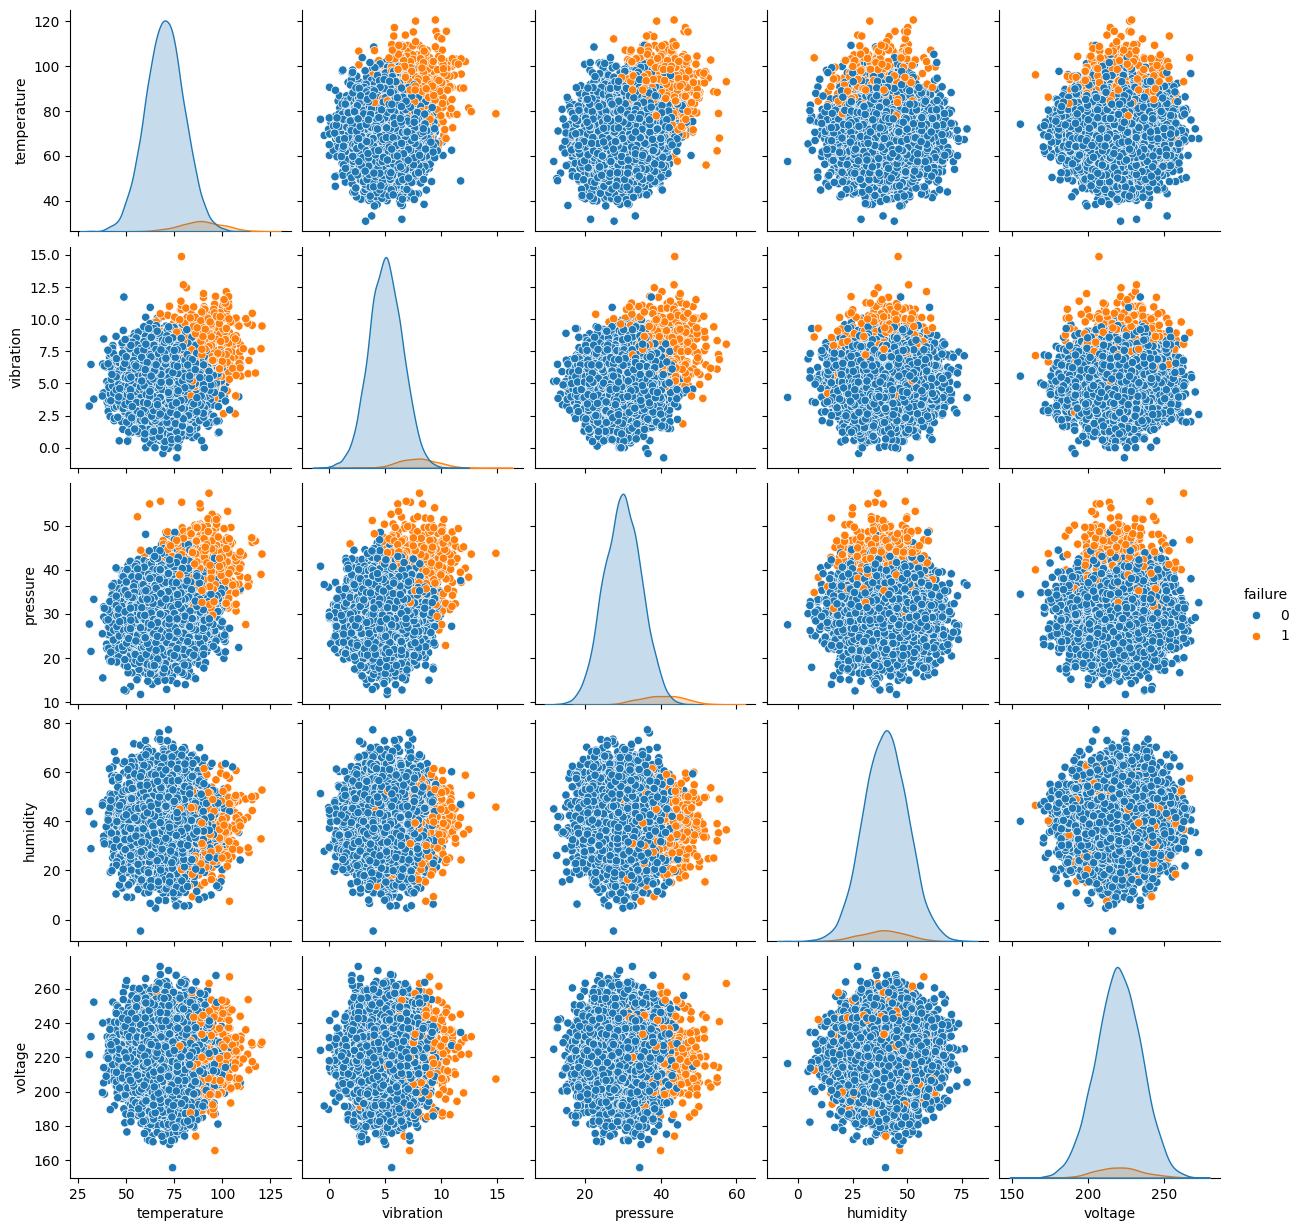

In [ ]:
sns.pairplot(data, hue="failure")
plt.show()

In [ ]:
X = data.drop('failure', axis=1)
y = data['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.plot(kind='barh')
plt.title("Feature Importance")
plt.show()

NameError: name 'model' is not defined

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))